## Solution to Endterm

### Q1 ($\chi^2$ Fit )

### Exponential Decay Model

$$ N(t) = N_0 \cdot e^{-\lambda t} $$

For the purpose of linear fitting, we will take log of this,

$$ \ln(N) = \ln(N_0) - \lambda t $$

### χ² Statistic

$$ \chi^2 = \sum_{i=1}^{n} \left( \frac{\ln(N_i) - (\ln(N_0) - \lambda t_i)}{\sigma(\ln(N_i))} \right)^2 $$


In [8]:
import numpy as np
from matplotlib import pyplot as plt
import scienceplots
plt.style.use(['science', 'grid', 'ieee'])
import pandas as pd
from scipy.stats import chi2
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

In [2]:
# data
data = pd.read_csv('endsemfit.txt', sep="\s+", header=None)
data.columns = ['t', 'N', 'sigma_N']

# decay function
def decay(t, N0, tau):
    return N0 * np.exp(-t / tau)

def linear_decay(t, N0, tau):
    return np.log(N0) - t / tau

In [3]:
print(data)

     t    N  sigma_N
0    1  106       10
1   15   80        9
2   30   98       10
3   45   75        9
4   60   74        8
5   75   73        8
6   90   49        7
7  105   38        6
8  120   37        6
9  135   22        5


In [4]:
def chi_square_fit(x, y, sigma_y):
    """
    Perform chi-square linear regression when only standard deviation of y is given.

    Parameters:
        x (array-like): Independent variable.
        y (array-like): Dependent variable.
        sigma_y (array-like): Standard deviation of y.

    Returns:
        a0 (float): Intercept of the linear model.
        a1 (float): Slope of the linear model.
        cov_matrix (ndarray): Covariance matrix of parameters.
        chi_square (float): Chi-square value.
    """
    # weights
    W = np.diag(1.0 / sigma_y**2)

    # weighted sums
    Wx = W @ x
    Wy = W @ y
    Wxy = W @ (x * y)
    Wxx = W @ (x**2)

    # parameters
    D = np.sum(W) * np.sum(Wxx) - np.sum(Wx)**2
    a1 = (np.sum(W) * np.sum(Wxy) - np.sum(Wx) * np.sum(Wy)) / D
    a0 = (np.sum(Wxx) * np.sum(Wy) - np.sum(Wx) * np.sum(Wxy)) / D

    # covariance matrix
    cov_matrix = np.array([
        [np.sum(Wxx) / D, -np.sum(Wx) / D],
        [-np.sum(Wx) / D, np.sum(W) / D]
    ])

    # chi-square value
    y_pred = a0 + a1 * x
    chi_square = np.sum(((y - y_pred) / sigma_y)**2)

    return a0, a1, cov_matrix, chi_square

In [5]:
# chi-square linear regression
intercept, slope, cov_matrix, chi_square = chi_square_fit(data['t'], np.log(data['N']), 1/data['sigma_N'])

slope_err = np.sqrt(cov_matrix[1,1])
intercept_err = np.sqrt(cov_matrix[0,0])

# lifetime and its error
tau = -1 / slope
tau_error = slope_err / slope**2


print(f"slope: {slope} ± {slope_err}")
print(f"Lifetime: {tau} ± {tau_error}")

slope: -0.009257191960784126 ± 0.0010146470187917449
Lifetime: 108.02411835427635 ± 11.840129286515191


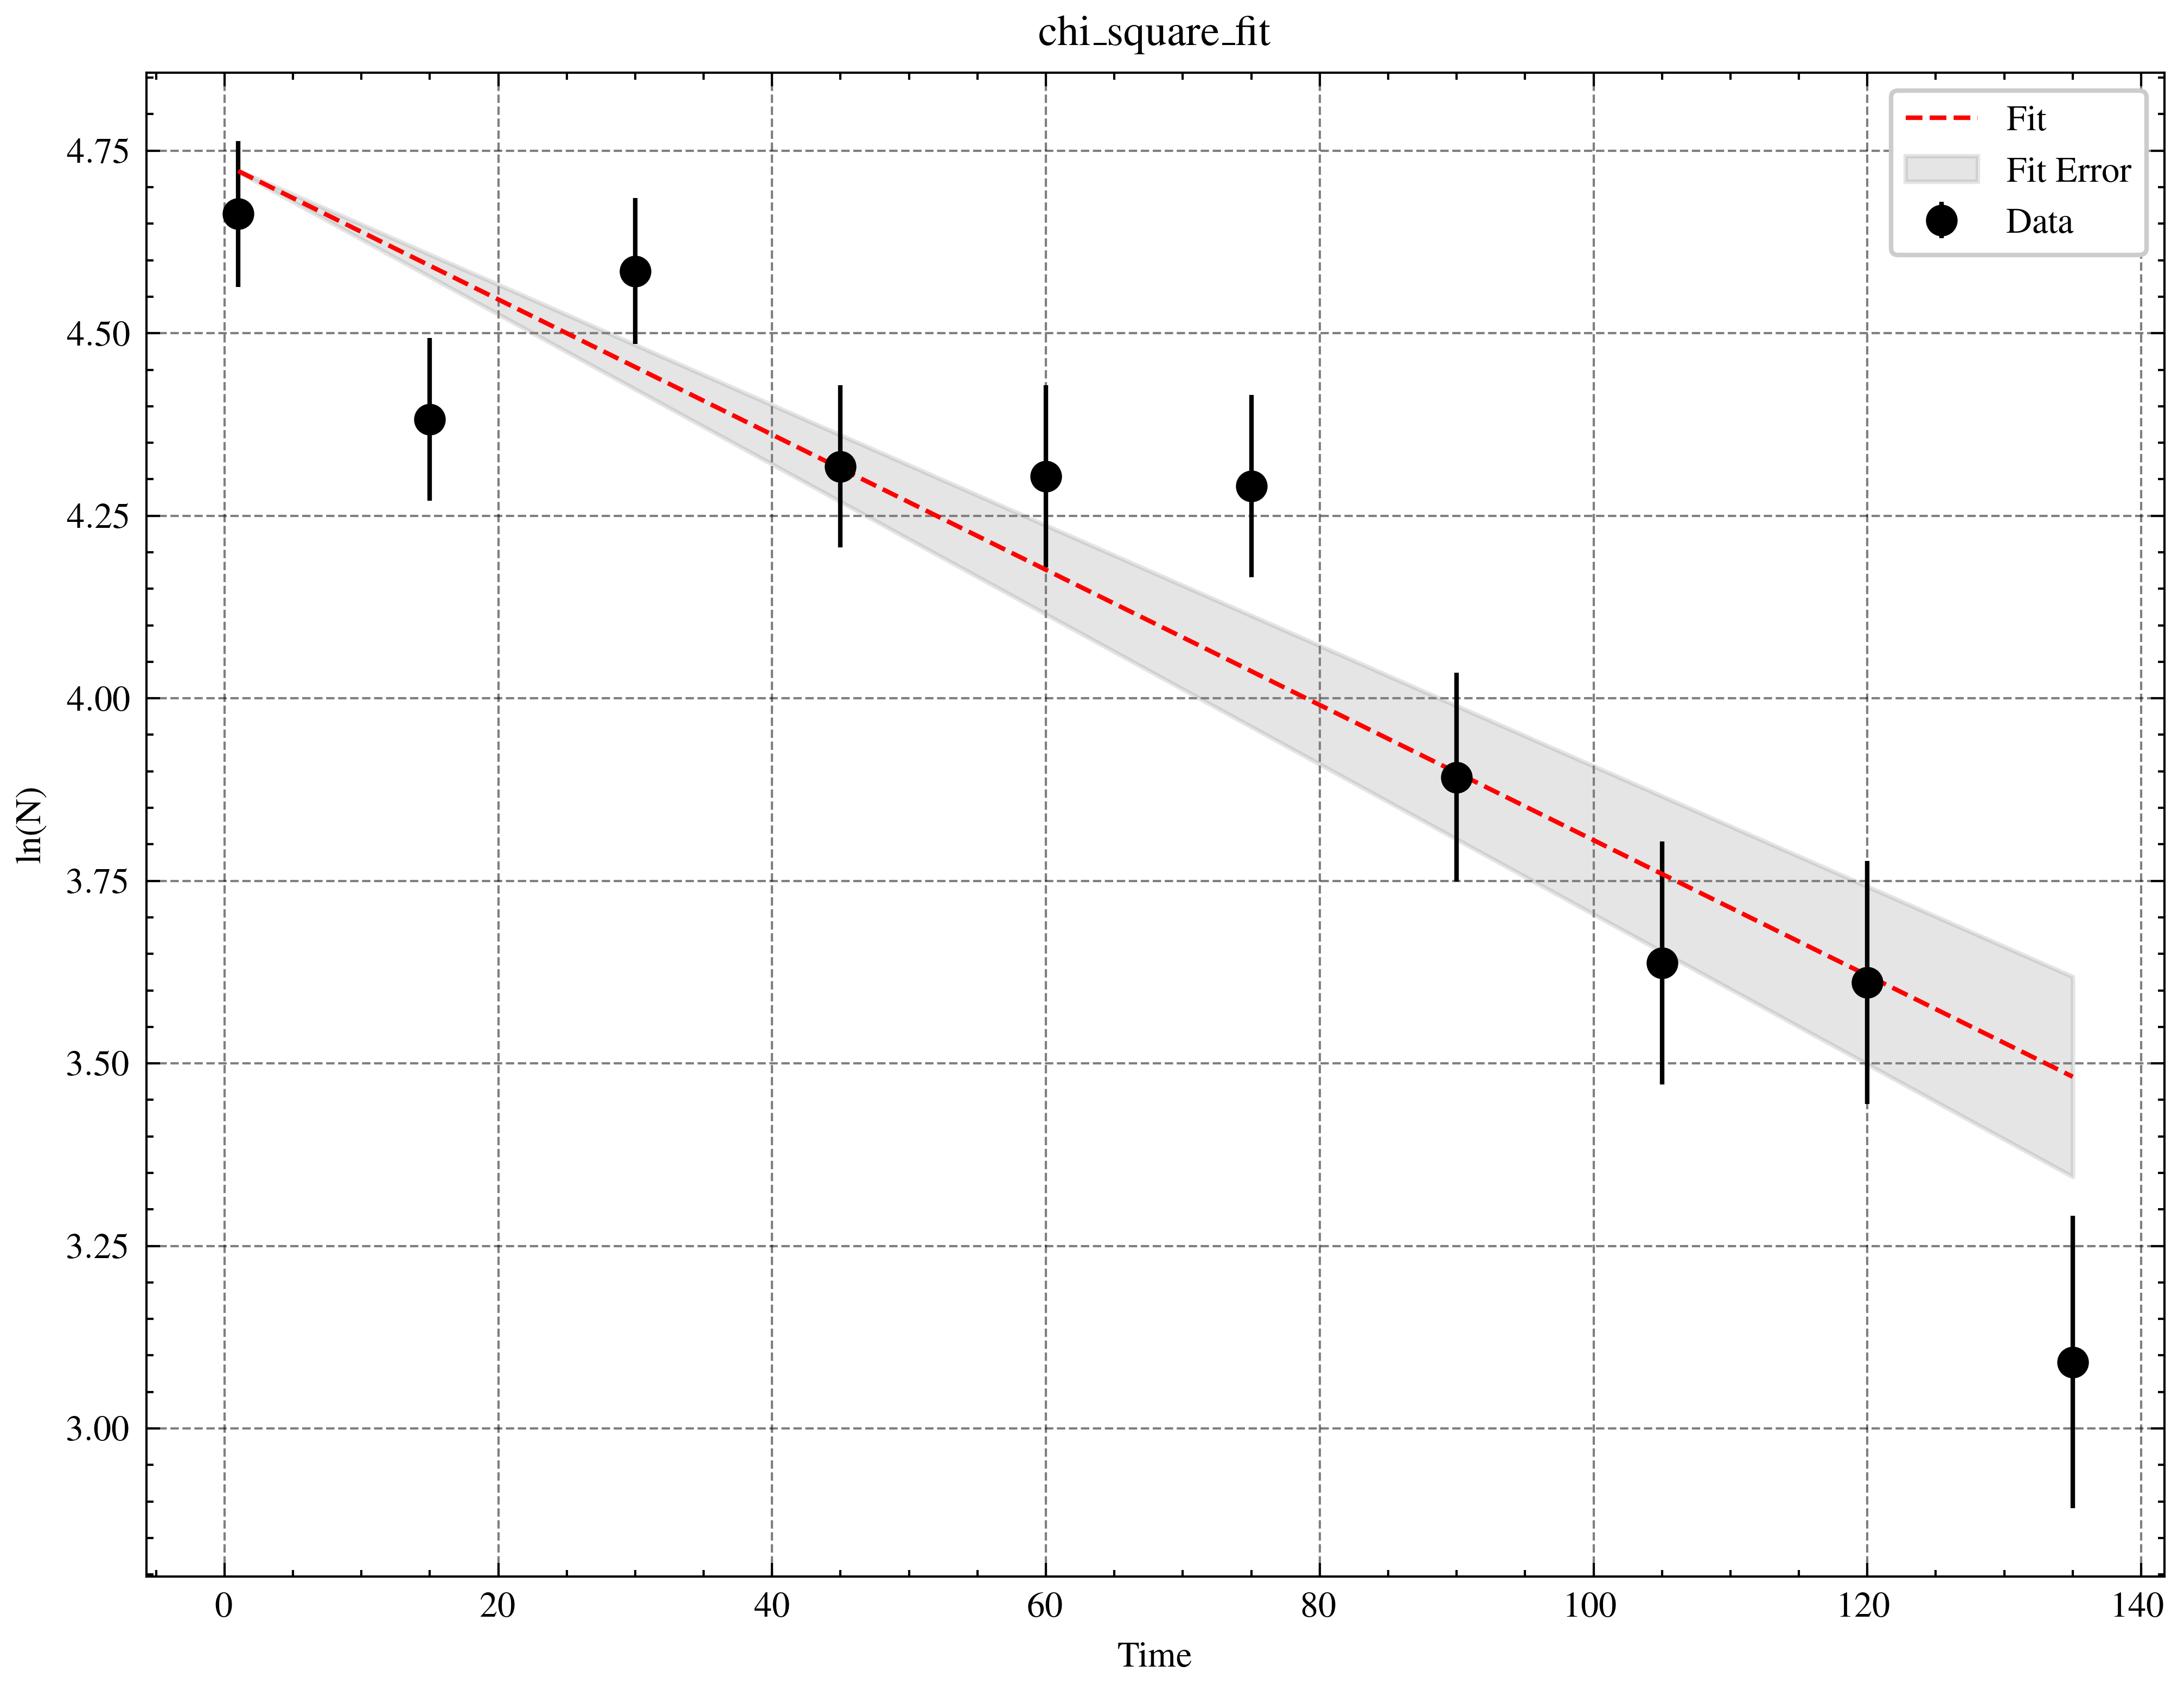

In [6]:
plt.figure(figsize=(8, 6))
plt.errorbar(data['t'], np.log(data['N']), yerr=1/data['sigma_N'], fmt='o', label='Data')

# regression line
x_fit = np.linspace(min(data['t']), max(data['t']), 100)
y_fit = intercept + slope * x_fit
plt.plot(x_fit, y_fit, color='red', label='Fit')

# error bands
y_fit_upper = intercept + (slope + slope_err) * x_fit
y_fit_lower = intercept + (slope - slope_err) * x_fit
plt.fill_between(x_fit, y_fit_upper, y_fit_lower, color='gray', alpha=0.2, label='Fit Error')

plt.xlabel('Time')
plt.ylabel('ln(N)')
plt.title('chi_square_fit')
plt.legend()

plt.show()

### Hypothesis Test
Compare $\chi^2$ to a critical value at 5% significance level. 

In [9]:
df = len(data['t']) - 2
chi2_critical = chi2.ppf(0.95, df)

print(f"Chi-square value: {chi_square}")
print(f"Chi-square critical value: {chi2_critical}")
print(f"Fit is acceptable at 5% level of significance: {chi_square < chi2_critical}")

Chi-square value: 15.170840594562925
Chi-square critical value: 15.50731305586545
Fit is acceptable at 5% level of significance: True


### Q2 fixed point method

In [32]:
# parameters
T = 300 #K
p = 5.95
R = 0.0821
a = 6.254
b = 0.05422

In [33]:
def f_1(v): 
    return (p + a/v**2)*(v - b) - R*T

def g_1(v): 
    return R*T/(p + a/v**2) + b

In [34]:
# f and g
f = f_1
g = g_1

# parameters
xi = 0.01
xf = 4
iterations = 200
x = [xi + (xf - xi) * i / 199 for i in range(200)]

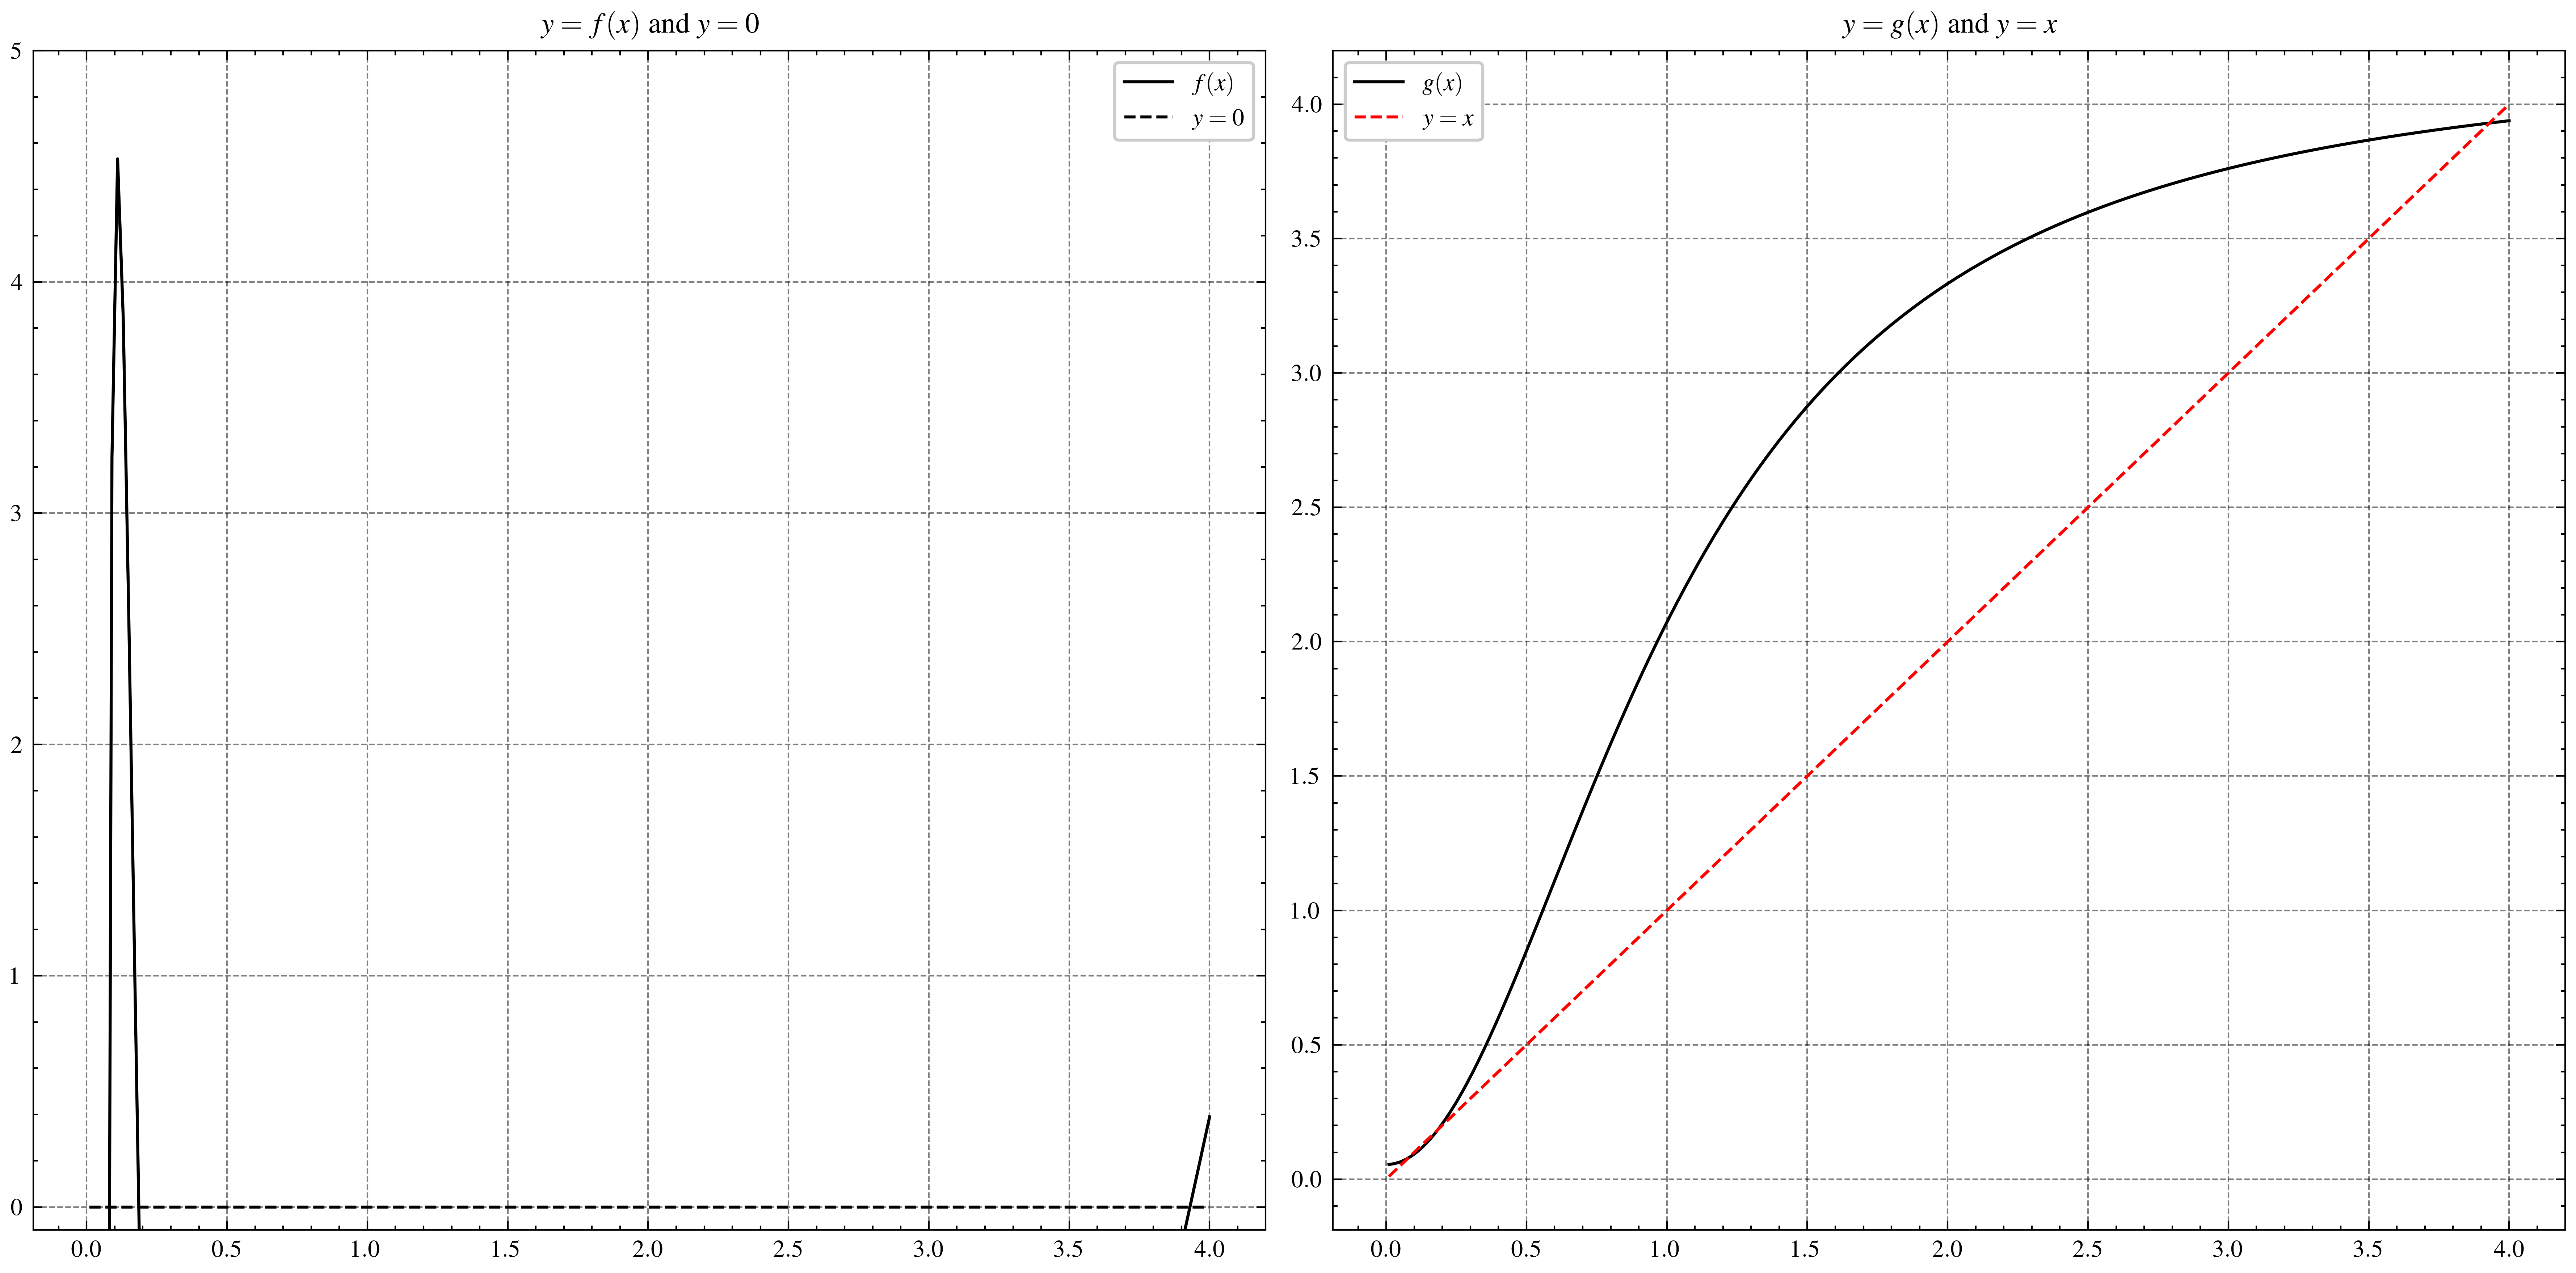

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# f(x)
axs[0].plot(x, [f(xi) for xi in x], label='$f(x)$')
axs[0].plot([xi, xf], [0, 0], 'k--', label='$y=0$')
axs[0].set_ylim(-0.1, 5)
axs[0].set_title('$y = f(x)$ and $y=0$')
axs[0].grid(True)
axs[0].legend()

# g(x)
axs[1].plot(x, [g(xi) for xi in x], label='$g(x)$')
axs[1].plot(x, x, 'r--', label='$y=x$')
axs[1].set_title('$y = g(x)$ and $y=x$')
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()

Both the plot shows that we will have three roots in between the $(0, 4)$. First two roots are very close to each other and hence bit difficult to reach the middle root.

Solving x = g(x) starting to the left, at x_0 = 0.01
converged at 199th iteration
x_199 = 0.07811
Solving x = g(x) starting to the right, at x_0 = 2.0
converged at 199th iteration
x_199 = 3.92995


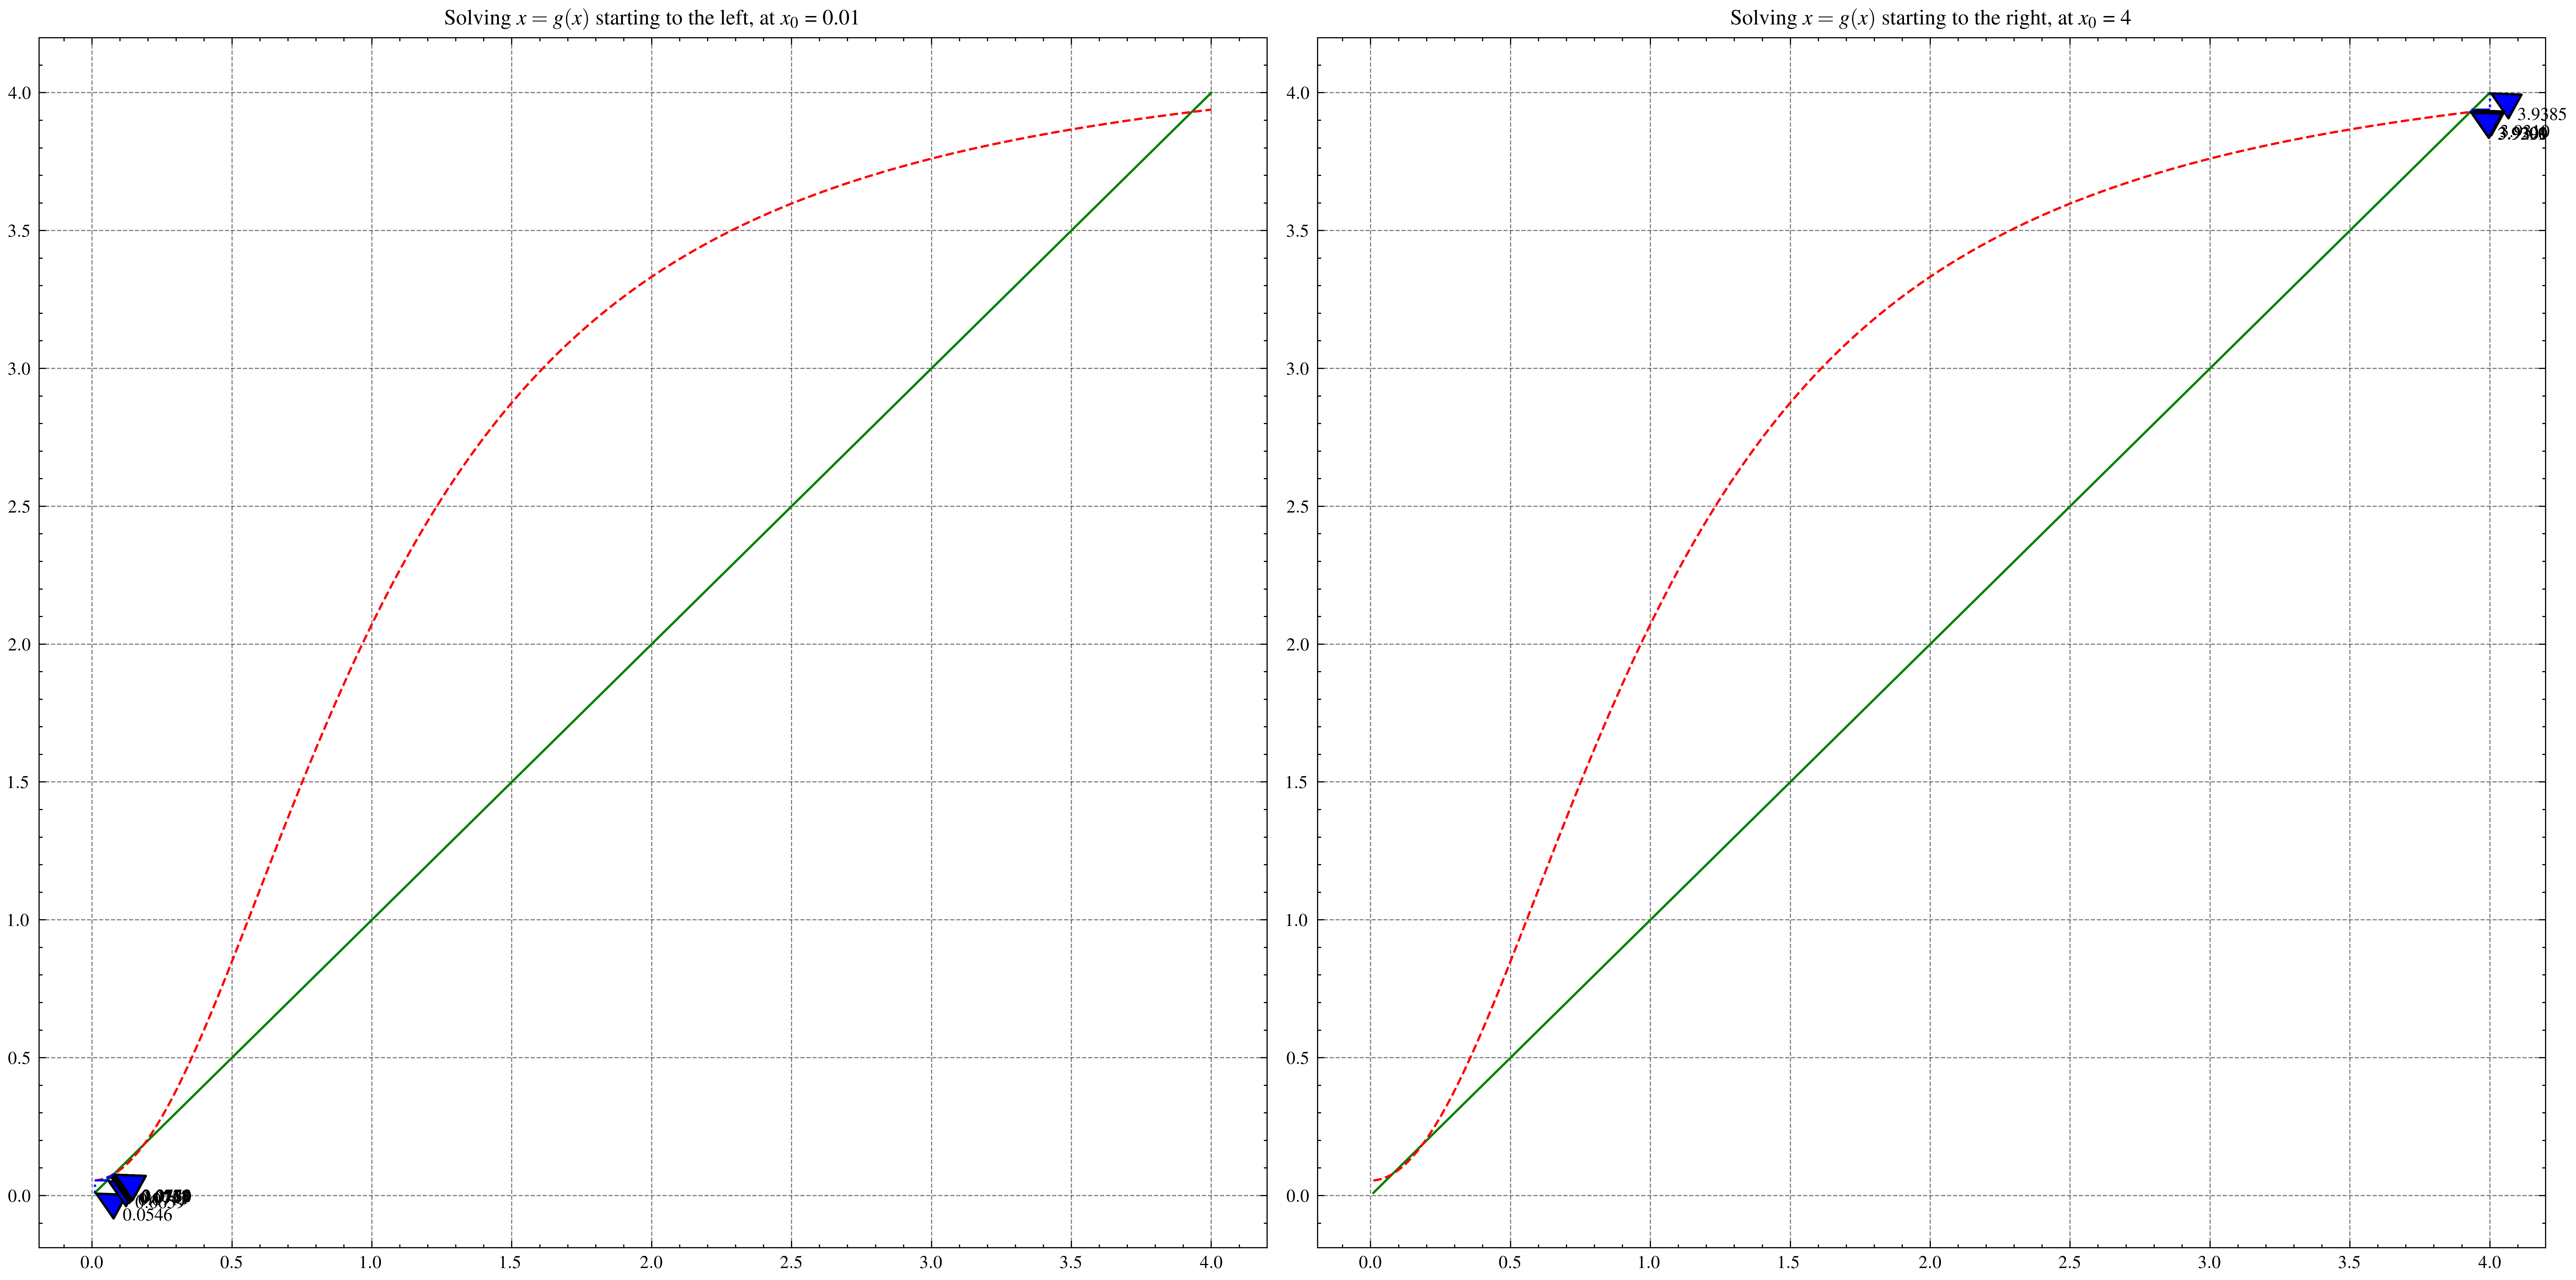

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Start at left
print(f"Solving x = g(x) starting to the left, at x_0 = {xi}")
x_k = xi
axs[0].set_title(f"Solving $x = g(x)$ starting to the left, at $x_0$ = {xi}")
axs[0].plot(x, x, 'g', label='$y = x$')
axs[0].plot(x, [g_1(xi) for xi in x], 'r', label='$y = \exp(-x)$')
axs[0].grid(True)
for k in range(iterations):
    x_k_plus_1 = g_1(x_k)
    axs[0].annotate(f'${x_k_plus_1:.4f}$', xy=(x_k, x_k), xytext=(x_k + 0.1, x_k - 0.1), arrowprops=dict(facecolor='blue', shrink=0.05))
    axs[0].plot([x_k, x_k], [x_k, x_k_plus_1], 'b')
    axs[0].plot([x_k, x_k_plus_1], [x_k_plus_1, x_k_plus_1], 'b')
    x_k = x_k_plus_1
    if k == iterations-1:
        print(f"converged at {k}th iteration")
        print(f"x_{k} = {x_k_plus_1:.5f}")

# Start at right
print(f"Solving x = g(x) starting to the right, at x_0 = {xf/2}")
x_k = xf
axs[1].set_title(f"Solving $x = g(x)$ starting to the right, at $x_0$ = {xf}")
axs[1].plot(x, x, 'g', label='$y = x$')
axs[1].plot(x, [g_1(xi) for xi in x], 'r', label='$y = \exp(-x)$')
axs[1].grid(True)
for k in range(iterations):
    x_k_plus_1 = g_1(x_k)
    axs[1].annotate(f'${x_k_plus_1:.4f}$', xy=(x_k, x_k), xytext=(x_k + 0.1, x_k - 0.1), arrowprops=dict(facecolor='blue', shrink=0.05))
    axs[1].plot([x_k, x_k], [x_k, x_k_plus_1], 'b')
    axs[1].plot([x_k, x_k_plus_1], [x_k_plus_1, x_k_plus_1], 'b')
    x_k = x_k_plus_1
    if k == iterations-1:
        print(f"converged at {k}th iteration")
        print(f"x_{k} = {x_k_plus_1:.5f}")

plt.tight_layout()
plt.show()

For this particular parameterization, we will see two roots $v_1 = 0.0781$ and $v_2=3.9299$.

In [37]:
def f_1(v): 
    return (p + a/v**2)*(v - b) - R*T

def g_1(v): 
    return np.sqrt(a*(v-b)/(R*T - p*(v-b)))

In [40]:
# f and g
f = f_1
g = g_1

# parameters
xi = 0.06
xf = 0.2
iterations = 200
x = [xi + (xf - xi) * i / 199 for i in range(200)]

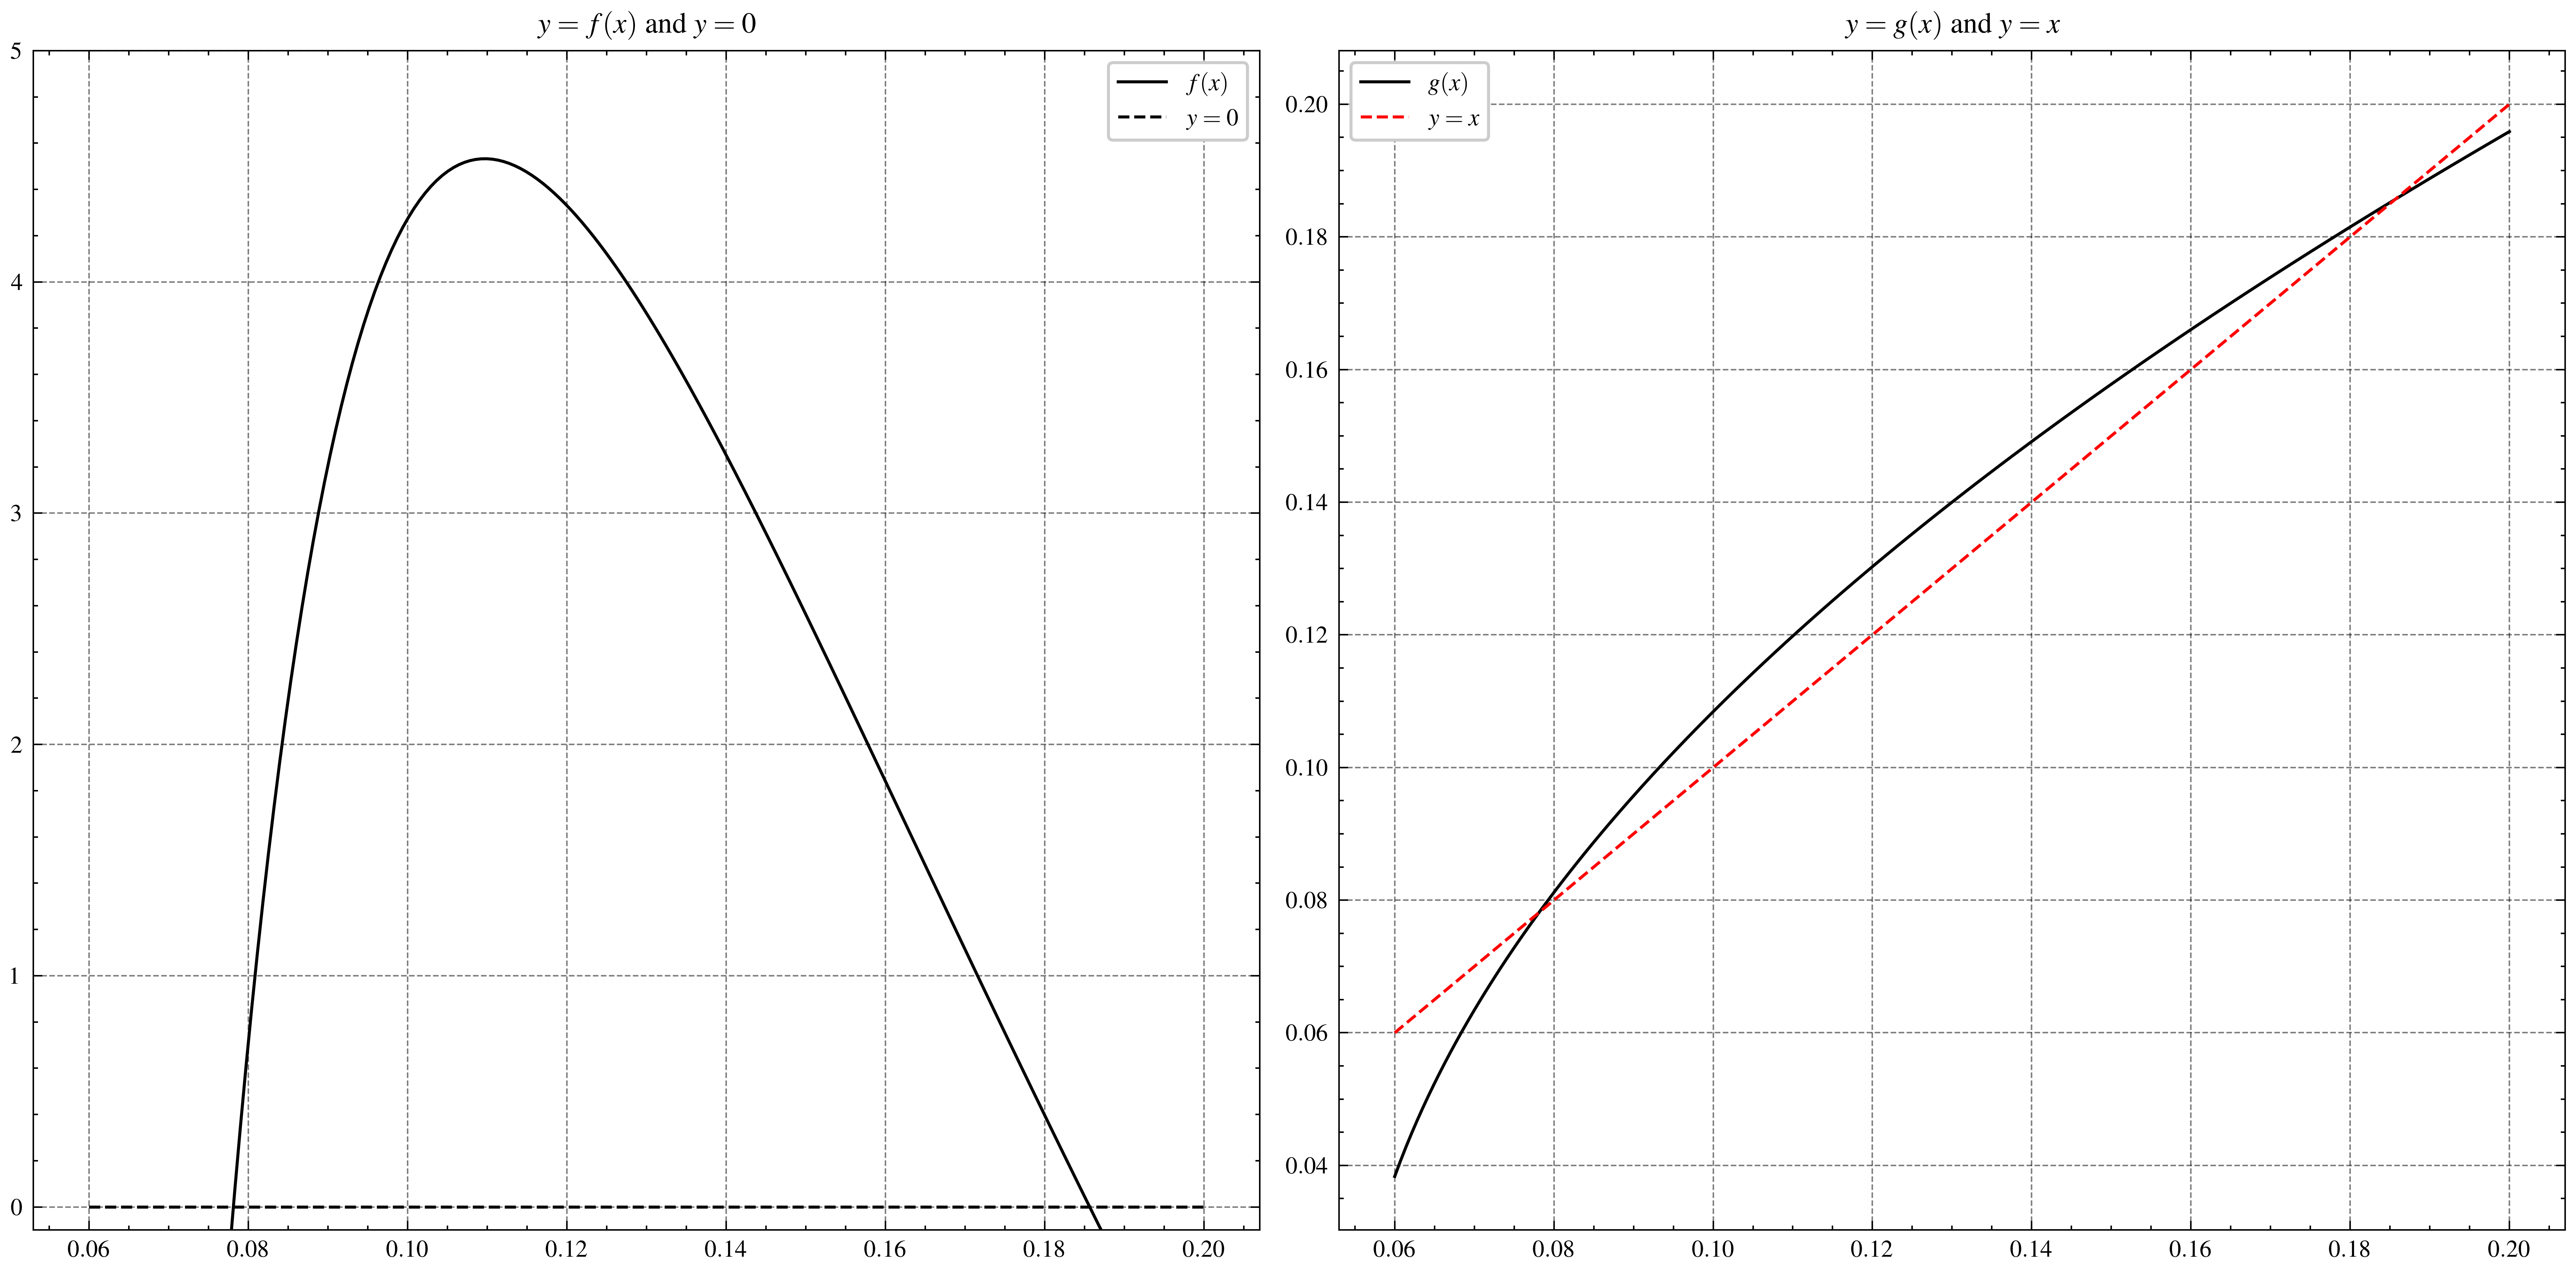

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# f(x)
axs[0].plot(x, [f(xi) for xi in x], label='$f(x)$')
axs[0].plot([xi, xf], [0, 0], 'k--', label='$y=0$')
axs[0].set_ylim(-0.1, 5)
axs[0].set_title('$y = f(x)$ and $y=0$')
axs[0].grid(True)
axs[0].legend()

# g(x)
axs[1].plot(x, [g(xi) for xi in x], label='$g(x)$')
axs[1].plot(x, x, 'r--', label='$y=x$')
axs[1].set_title('$y = g(x)$ and $y=x$')
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()

Solving x = g(x) starting to the left, at x_0 = 0.06
converged at 199th iteration
x_199 = nan
Solving x = g(x) starting to the right, at x_0 = 0.1
converged at 199th iteration
x_199 = 0.18566


/var/folders/bx/vskb8z0x7571bn2pj28twrd80000gp/T/ipykernel_24238/494205051.py:5: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(a*(v-b)/(R*T - p*(v-b)))


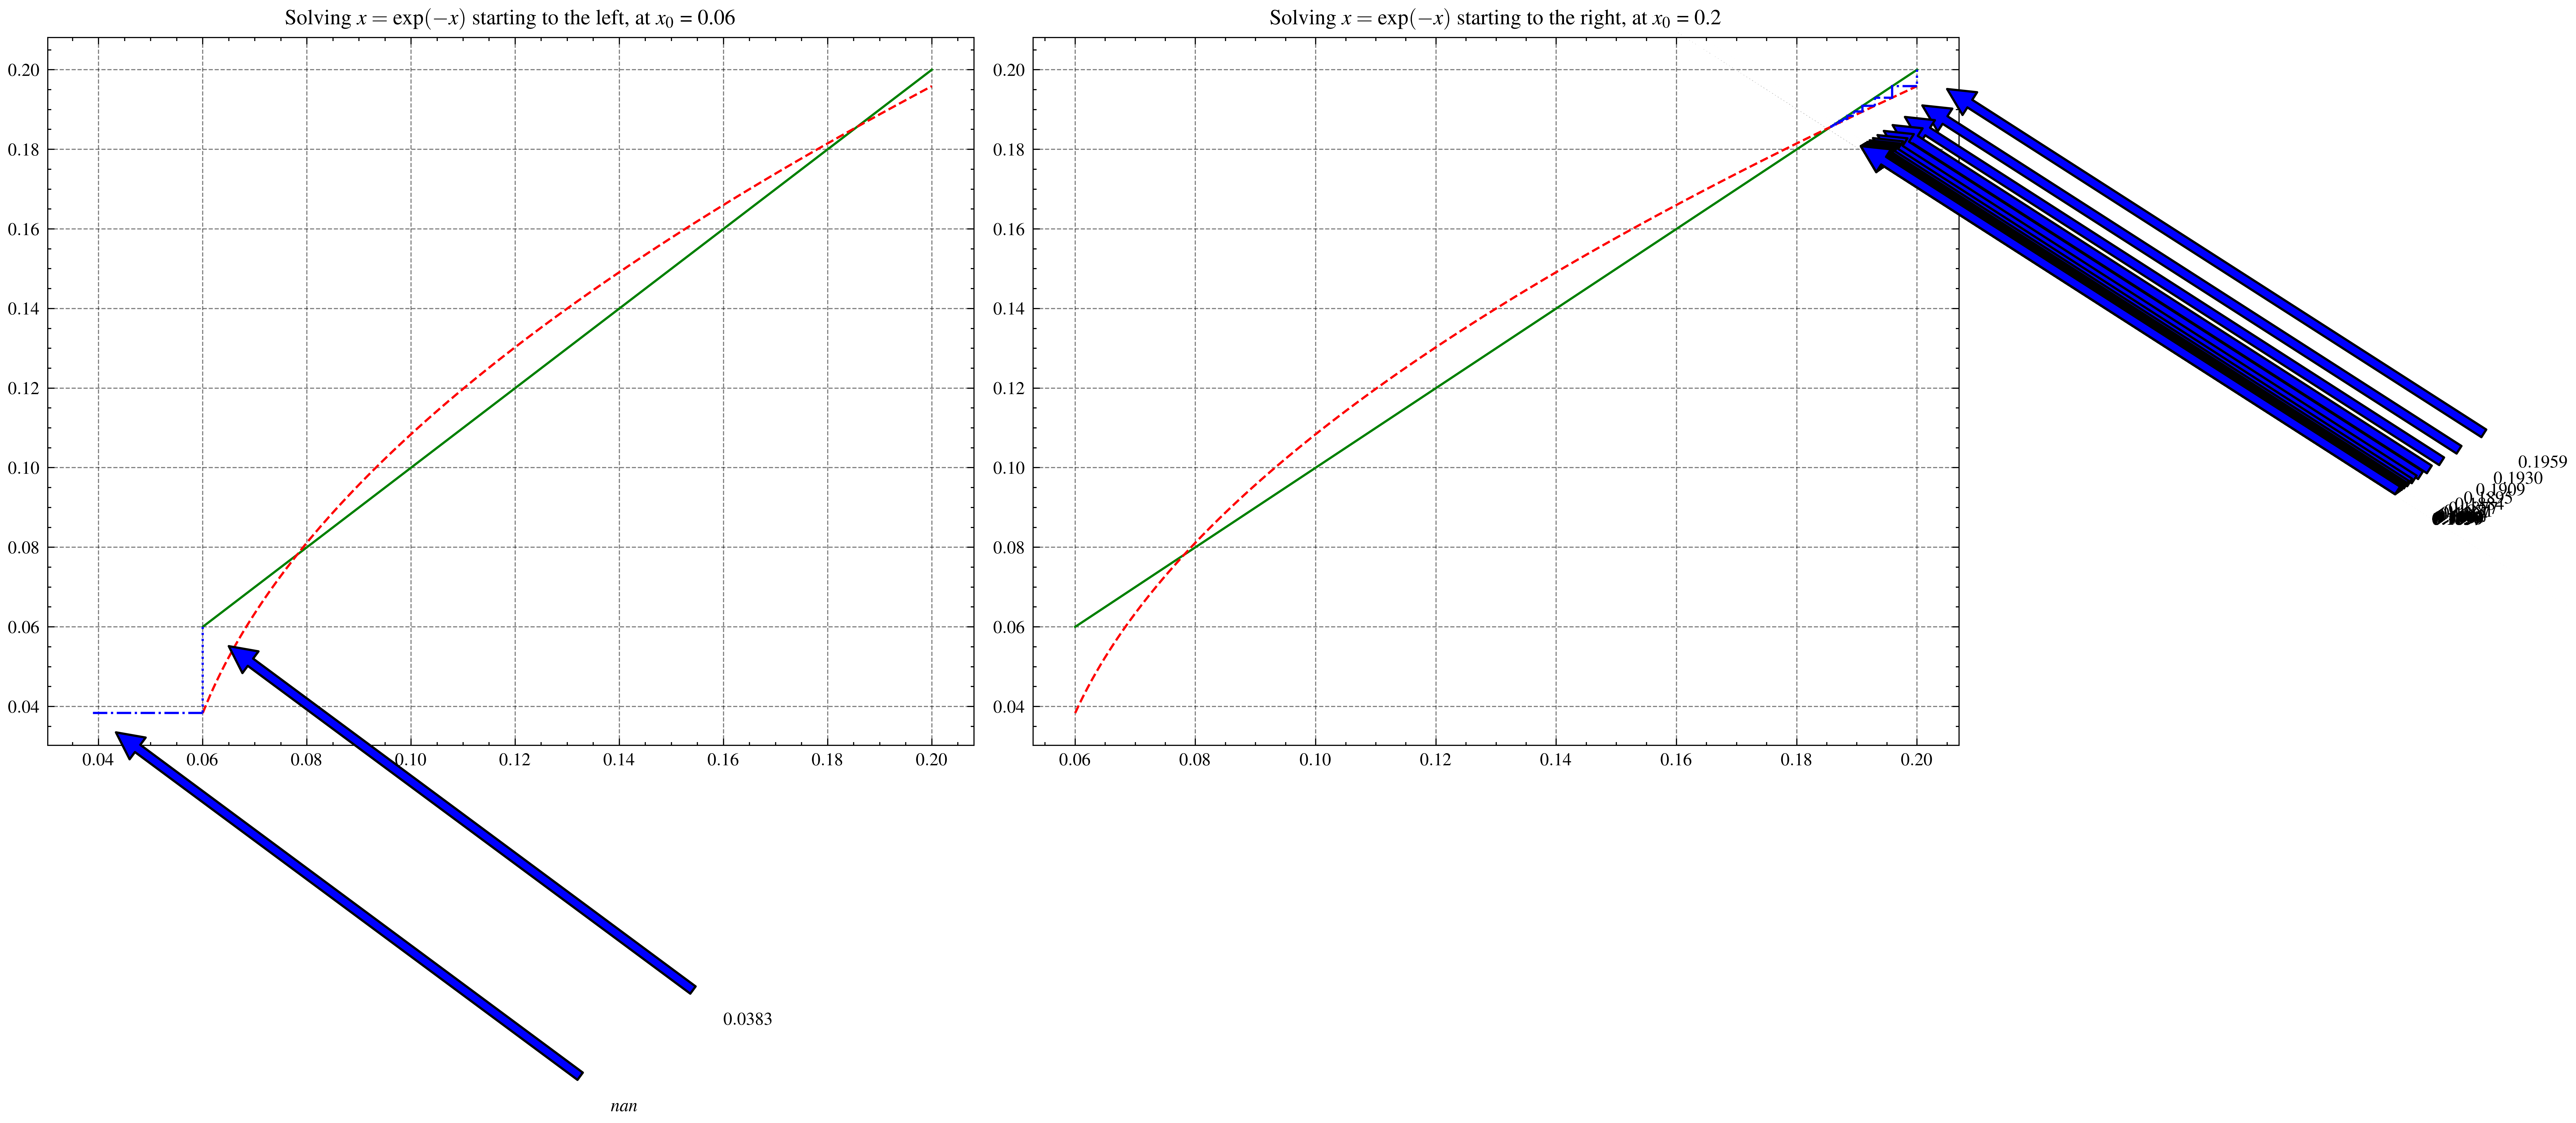

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Start at left
print(f"Solving x = g(x) starting to the left, at x_0 = {xi}")
x_k = xi
axs[0].set_title(f"Solving $x = \exp(-x)$ starting to the left, at $x_0$ = {xi}")
axs[0].plot(x, x, 'g', label='$y = x$')
axs[0].plot(x, [g_1(xi) for xi in x], 'r', label='$y = \exp(-x)$')
axs[0].grid(True)
for k in range(iterations):
    x_k_plus_1 = g_1(x_k)
    axs[0].annotate(f'${x_k_plus_1:.4f}$', xy=(x_k, x_k), xytext=(x_k + 0.1, x_k - 0.1), arrowprops=dict(facecolor='blue', shrink=0.05))
    axs[0].plot([x_k, x_k], [x_k, x_k_plus_1], 'b')
    axs[0].plot([x_k, x_k_plus_1], [x_k_plus_1, x_k_plus_1], 'b')
    x_k = x_k_plus_1
    if k == iterations-1:
        print(f"converged at {k}th iteration")
        print(f"x_{k} = {x_k_plus_1:.5f}")

# Start at right
print(f"Solving x = g(x) starting to the right, at x_0 = {xf/2}")
x_k = xf
axs[1].set_title(f"Solving $x = \exp(-x)$ starting to the right, at $x_0$ = {xf}")
axs[1].plot(x, x, 'g', label='$y = x$')
axs[1].plot(x, [g_1(xi) for xi in x], 'r', label='$y = \exp(-x)$')
axs[1].grid(True)
for k in range(iterations):
    x_k_plus_1 = g_1(x_k)
    axs[1].annotate(f'${x_k_plus_1:.4f}$', xy=(x_k, x_k), xytext=(x_k + 0.1, x_k - 0.1), arrowprops=dict(facecolor='blue', shrink=0.05))
    axs[1].plot([x_k, x_k], [x_k, x_k_plus_1], 'b')
    axs[1].plot([x_k, x_k_plus_1], [x_k_plus_1, x_k_plus_1], 'b')
    x_k = x_k_plus_1
    if k == iterations-1:
        print(f"converged at {k}th iteration")
        print(f"x_{k} = {x_k_plus_1:.5f}")

plt.tight_layout()
plt.show()

We had tried it for two parameterization where the middle root was really difficult to find with the first two roots (sizewise) but was found to using a second parameterization.

## Q5: Power Method

In [25]:
from tabulate import tabulate # for printing matrix and vectors
from fractions import Fraction

In [26]:
def read_matrix_vector(filename):
    """Read the matrix and vector from a text file. Able to handle fractions."""
    with open(filename, 'r') as file:
        lines = file.readlines()
    
    matrix = []
    for line in lines[:]: 
        line = line.strip()
        row = []
        for val in line.split():
            # Handle fractions
            if '/' in val:
                numerator, denominator = val.split('/')
                frac_val = Fraction(int(numerator), int(denominator))
                row.append(float(frac_val))
            else:
                row.append(float(val))
        matrix.append(row)
    
    return np.array(matrix)

In [27]:
filename = 'endsemmat.txt'
A = read_matrix_vector(filename)
    
print("Matrix:")
print(tabulate(A, tablefmt='fancy_grid'))

Matrix:
╒════╤════╤════╤════╤════╕
│  2 │ -1 │  0 │  0 │  0 │
├────┼────┼────┼────┼────┤
│ -1 │  2 │ -1 │  0 │  0 │
├────┼────┼────┼────┼────┤
│  0 │ -1 │  2 │ -1 │  0 │
├────┼────┼────┼────┼────┤
│  0 │  0 │ -1 │  2 │ -1 │
├────┼────┼────┼────┼────┤
│  0 │  0 │  0 │ -1 │  2 │
╘════╧════╧════╧════╧════╛


In [41]:
class PowerEigendecomposition:
    """
    POWER eigenvalue algorithm for symmetric matrices
    """

    def __init__(self, store_intermediate=False):
        self.eigenvalues = None
        self.eigenvectors = None
        self.store_intermediate = store_intermediate

    def power_factorization(self, X):
        """
        Compute the power factorization of a square matrix using gram-schmidt 
        orthonormalization.
        """

        X = X.T # want first index to be the column index (for convenience)

        q, r = np.zeros(X.shape), np.zeros(X.shape) # preallocate
        q[0] = X[0] / np.linalg.norm(X[0])
        r[0] = X @ q[0]
        for i in range(1, X.shape[0]):
            q[i] = X[i] - np.sum(np.dot(X[i], q[:i].T) * q[:i].T, axis=-1)
            q[i] /= np.linalg.norm(q[i])

            ## Update the upper triangular matrix R
            r[i, i:] = X[i:] @ q[i]
        
        q = q.T # because we took transpose beforehand for easier indexing
        return q, r

    def find_eigensystem(self, X, max_iter=2000, tol=1e-6):
        """
        Eigenvalues and eigenvectors of a matrix
        """
        prev = np.copy(X)
        tq = np.identity(X.shape[0])
        if self.store_intermediate: self.intermediate = [np.copy(X)]
        for i in range(max_iter):
            q, r = self.power_factorization(X)
            
            X = r @ q 

            tq = tq @ q # accumulate the eigenvector matrix

            if self.store_intermediate: self.intermediate.append(np.copy(X))

            ## Check for convergence and stop early if converged
            if np.linalg.norm(X - prev) < tol:
                break
            prev = np.copy(X)
        eigenvalues, eigenvectors = np.diag(X), tq
        sort_inds = np.argsort(eigenvalues)
        eigenvalues, eigenvectors = eigenvalues[sort_inds], eigenvectors[:, sort_inds]
        self.eigenvalues, self.eigenvectors = eigenvalues, eigenvectors
        return eigenvalues, eigenvectors

In [48]:
PowerSolver = PowerEigendecomposition(store_intermediate=True)
eigenvalues, eigenvectors = PowerSolver.find_eigensystem(A)

eigenvalues_list = eigenvalues.tolist()
eigenvectors_list = eigenvectors.tolist()

In [49]:
print("Eigenvalues and eigenvectors (Calculated):")
print("\nEigenvalues:")
print(tabulate([["Eigenvalues"] + eigenvalues_list], tablefmt="fancy_grid"))
print("\nEigenvectors:")
print(tabulate(eigenvectors_list, headers=["Eigenvector " + str(i+1) for i in range(len(eigenvectors_list))], tablefmt="fancy_grid"))

Eigenvalues and eigenvectors (Calculated):

Eigenvalues:
╒═════════════╤══════════╤═══╤═══╤═══╤═════════╕
│ Eigenvalues │ 0.267949 │ 1 │ 2 │ 3 │ 3.73205 │
╘═════════════╧══════════╧═══╧═══╧═══╧═════════╛

Eigenvectors:
╒═════════════════╤═════════════════╤═════════════════╤═════════════════╤═════════════════╕
│   Eigenvector 1 │   Eigenvector 2 │   Eigenvector 3 │   Eigenvector 4 │   Eigenvector 5 │
╞═════════════════╪═════════════════╪═════════════════╪═════════════════╪═════════════════╡
│        0.288675 │     0.5         │     0.57735     │     0.499999    │        0.288677 │
├─────────────────┼─────────────────┼─────────────────┼─────────────────┼─────────────────┤
│        0.5      │     0.5         │     3.71522e-11 │    -0.499998    │       -0.500002 │
├─────────────────┼─────────────────┼─────────────────┼─────────────────┼─────────────────┤
│        0.57735  │    -2.46031e-16 │    -0.57735     │    -2.04377e-06 │        0.57735  │
├─────────────────┼─────────────────┼────────

In [50]:
print("Eigenvalues and eigenvectors (Verified from Numpy):")
eigenvalues_np, eigenvectors_np = np.linalg.eigh(A)

eigenvalues_np_list = eigenvalues_np.tolist()
eigenvectors_np_list = eigenvectors_np.tolist()

# Print eigenvalues and eigenvectors using tabulate
print("\nEigenvalues (NumPy):")
print(tabulate([["Eigenvalues"] + eigenvalues_np_list], tablefmt="fancy_grid"))
print("\nEigenvectors (NumPy):")
print(tabulate(eigenvectors_np_list, headers=["Eigenvector " + str(i+1) for i in range(len(eigenvectors_np_list))], tablefmt="fancy_grid"))

Eigenvalues and eigenvectors (Verified from Numpy):

Eigenvalues (NumPy):
╒═════════════╤══════════╤═══╤═══╤═══╤═════════╕
│ Eigenvalues │ 0.267949 │ 1 │ 2 │ 3 │ 3.73205 │
╘═════════════╧══════════╧═══╧═══╧═══╧═════════╛

Eigenvectors (NumPy):
╒═════════════════╤═════════════════╤═════════════════╤═════════════════╤═════════════════╕
│   Eigenvector 1 │   Eigenvector 2 │   Eigenvector 3 │   Eigenvector 4 │   Eigenvector 5 │
╞═════════════════╪═════════════════╪═════════════════╪═════════════════╪═════════════════╡
│       -0.288675 │    -0.5         │     0.57735     │    -0.5         │        0.288675 │
├─────────────────┼─────────────────┼─────────────────┼─────────────────┼─────────────────┤
│       -0.5      │    -0.5         │    -6.75488e-17 │     0.5         │       -0.5      │
├─────────────────┼─────────────────┼─────────────────┼─────────────────┼─────────────────┤
│       -0.57735  │     4.25023e-16 │    -0.57735     │    -2.97483e-17 │        0.57735  │
├─────────────────┼─

In [51]:
a = c = -1
b = 2
n = 5

# eigenvalues and eigenvectors
eigenvalues = []
eigenvectors = []

for k in range(1, n+1):
    # eigenvalue
    eigenvalue = b + 2 * np.sqrt(a * c) * np.cos(k * np.pi / (n + 1))
    eigenvalues.append(eigenvalue)

    # eigenvector
    eigenvector = []

    for i in range(1, n+1):
        # eigenvector
        component = 2 * np.sqrt(np.abs(c /a))**(k) * np.sin(i * (k) * np.pi / (n + 1))
        eigenvector.append(component)

    eigenvectors.append(eigenvector)

print("Eigenvalues and eigenvectors (Analytical):")
print("\nEigenvalues:")
print(tabulate([["Eigenvalues"] + eigenvalues], tablefmt="fancy_grid"))
print("\nEigenvectors:")
print(tabulate(eigenvectors, headers=["Eigenvector " + str(i+1) for i in range(len(eigenvectors_list))], tablefmt="fancy_grid"))

Eigenvalues and eigenvectors (Analytical):

Eigenvalues:
╒═════════════╤═════════╤═══╤═══╤═══╤══════════╕
│ Eigenvalues │ 3.73205 │ 3 │ 2 │ 1 │ 0.267949 │
╘═════════════╧═════════╧═══╧═══╧═══╧══════════╛

Eigenvectors:
╒═════════════════╤═════════════════╤═════════════════╤═════════════════╤═════════════════╕
│   Eigenvector 1 │   Eigenvector 2 │   Eigenvector 3 │   Eigenvector 4 │   Eigenvector 5 │
╞═════════════════╪═════════════════╪═════════════════╪═════════════════╪═════════════════╡
│         1       │     1.73205     │     2           │     1.73205     │         1       │
├─────────────────┼─────────────────┼─────────────────┼─────────────────┼─────────────────┤
│         1.73205 │     1.73205     │     2.44929e-16 │    -1.73205     │        -1.73205 │
├─────────────────┼─────────────────┼─────────────────┼─────────────────┼─────────────────┤
│         2       │     2.44929e-16 │    -2           │    -4.89859e-16 │         2       │
├─────────────────┼─────────────────┼────────

The Analytical and calculated Eigenvalues and vectors are the same expect the analytical is scaled $2\sqrt{3}$ i.e $v_{\text{analytical}} = 2\sqrt{3} v_{\text{calculated}}$. Which is fine since  if $ v $ is an eigenvector of a matrix $ A $ corresponding to eigenvalue $ \lambda $, then $ 2v $, $ -3v $, or any other scalar multiple of $ v $ will also be eigenvectors corresponding to $ \lambda $. We had found out the normalized eigenvector.

In [52]:
a = c = -1
b = 2
n = 5

# eigenvalues and eigenvectors
eigenvalues = []
eigenvectors = []

for k in range(1, n+1):
    # eigenvalue
    eigenvalue = b + 2 * np.sqrt(a * c) * np.cos(k * np.pi / (n + 1))
    eigenvalues.append(eigenvalue)

    # eigenvector
    eigenvector = []

    for i in range(1, n+1):
        # eigenvector
        component = 2 * np.sqrt(np.abs(c /a))**(k) * np.sin(i * (k) * np.pi / (n + 1)) *(1/(2*np.sqrt(3)))
        eigenvector.append(component)

    eigenvectors.append(eigenvector)

print("Eigenvalues and eigenvectors (Analytical Scaled):")
print("\nEigenvalues:")
print(tabulate([["Eigenvalues"] + eigenvalues], tablefmt="fancy_grid"))
print("\nEigenvectors:")
print(tabulate(eigenvectors, headers=["Eigenvector " + str(i+1) for i in range(len(eigenvectors_list))], tablefmt="fancy_grid"))

Eigenvalues and eigenvectors (Analytical Scaled):

Eigenvalues:
╒═════════════╤═════════╤═══╤═══╤═══╤══════════╕
│ Eigenvalues │ 3.73205 │ 3 │ 2 │ 1 │ 0.267949 │
╘═════════════╧═════════╧═══╧═══╧═══╧══════════╛

Eigenvectors:
╒═════════════════╤═════════════════╤═════════════════╤═════════════════╤═════════════════╕
│   Eigenvector 1 │   Eigenvector 2 │   Eigenvector 3 │   Eigenvector 4 │   Eigenvector 5 │
╞═════════════════╪═════════════════╪═════════════════╪═════════════════╪═════════════════╡
│        0.288675 │      0.5        │      0.57735    │      0.5        │        0.288675 │
├─────────────────┼─────────────────┼─────────────────┼─────────────────┼─────────────────┤
│        0.5      │      0.5        │      7.0705e-17 │     -0.5        │       -0.5      │
├─────────────────┼─────────────────┼─────────────────┼─────────────────┼─────────────────┤
│        0.57735  │      7.0705e-17 │     -0.57735    │     -1.4141e-16 │        0.57735  │
├─────────────────┼─────────────────┼─

## Q6 Accept/Reject pdf

In [55]:
a = 2
def p(x):
    if x < 2 and x > -2:
        return 0.5 * (a**2 - x**2)
    else:
        return 0
    
def g(x):
    return 1/(np.sqrt(2 * np.pi)) * np.exp(-x**2 / 2)

In [56]:
x = np.linspace(-2,2,100)
y = [p(xi) for xi in x]

In [57]:
def accept_reject(N):
    xmin = -2
    xmax = 2
    pmax = 2

    n_accept=0
    n_samples = 0
    x_list = [] 
    while n_accept < N:
        n_samples += 1
        t = (xmax-xmin)*np.random.normal() + xmin
        y = np.random.rand()
        if y < p(t)/ pmax:
            n_accept += 1
            x_list.append(t)
            
    success_probability = N/n_samples
    return x_list, success_probability

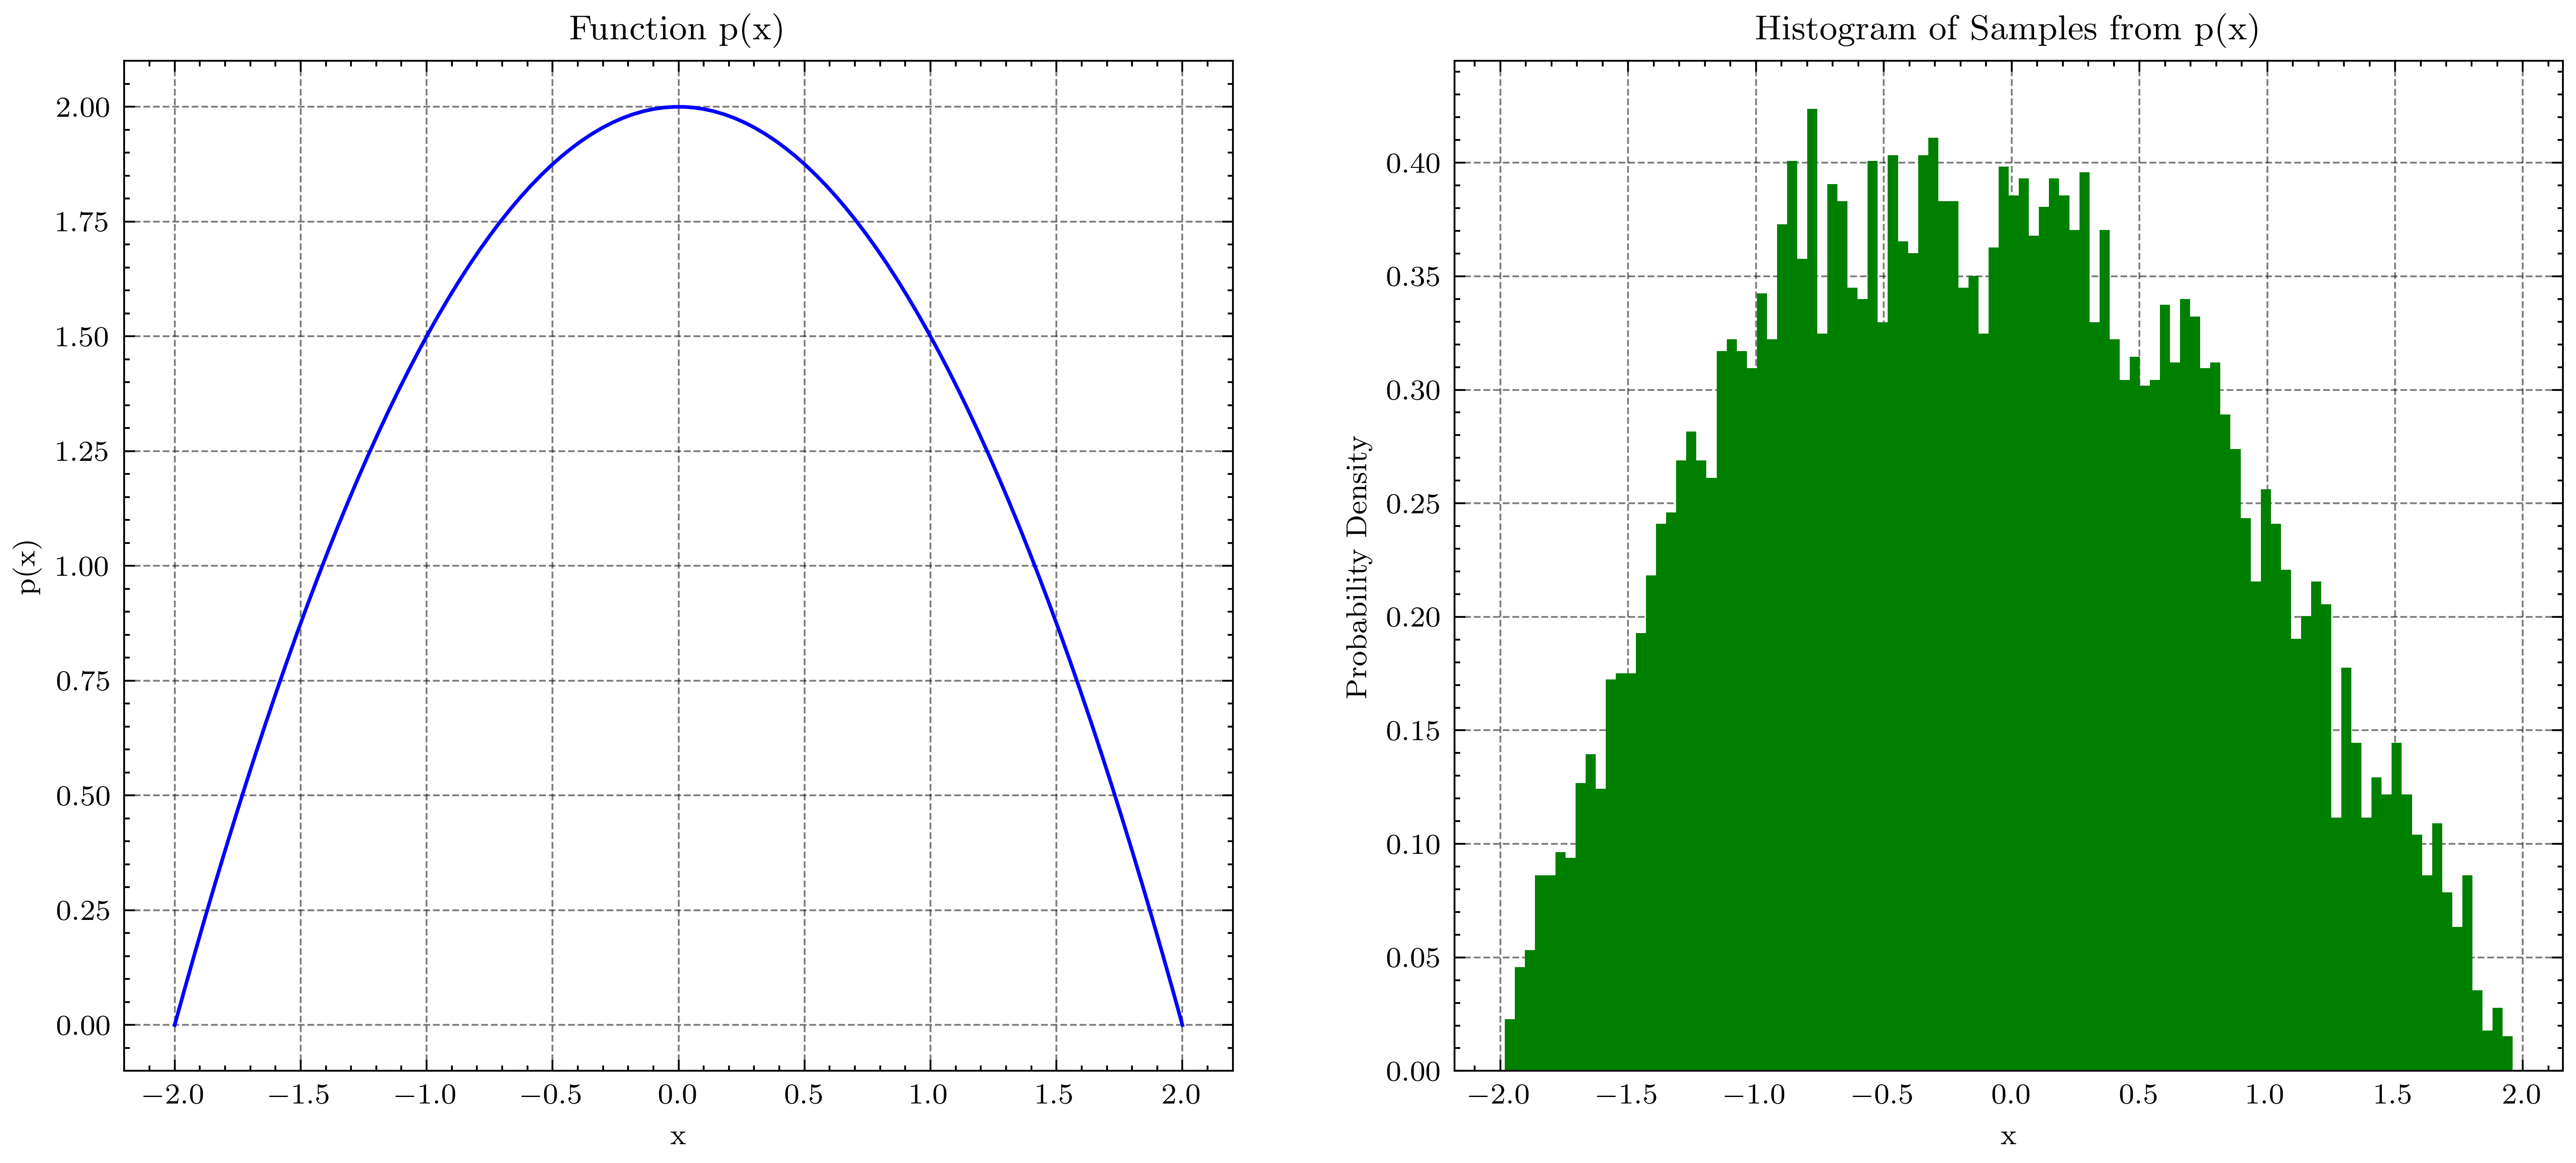

In [58]:
samples, P = accept_reject(10000)

# function p(x)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, y, color='blue')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title('Function p(x)')

# histogram of the samples
plt.subplot(1, 2, 2)
plt.hist(samples, bins=100, color='green', density=True)
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Histogram of Samples from p(x)')
plt.show()

In [59]:
max_ratio = np.sqrt(2*np.pi)*2
print("c =", max_ratio)

c = 5.0132565492620005


In [60]:
print("expected success probability =", 1/max_ratio)
print("actual success probability =", P)

expected success probability = 0.19947114020071635
actual success probability = 0.2309308823869016


The expected success probability, 0.1995, is lower than the actual success probability, 0.2304. This suggests that the acceptance-rejection method is performing better than anticipated. A higher success probability indicates that more samples from the target distribution were accepted during the sampling process compared to what was theoretically expected.

## Q7 Variational Monte Carlo

In [58]:
from random import random

In [59]:
Nwalker=600;MCSteps=20000
x=[0]*Nwalker
nAccept=0;eSum=0
alphas = np.linspace(2.2, 2.8, 20)  
average_energies = []
alpha = 0.5

In [60]:
def initialize():
    
    for i in range(Nwalker):
        x[i]=2*random()-1

def p(xTrial,x):
    # ratio of rho(xTrial) / rho(x)
    if xTrial > -alpha and xTrial < alpha and x > -alpha and x < alpha:
        return ((alpha**2 - xTrial**2)/(alpha**2 - x**2))**2
    else:
        return 0

def eLocal(x):
    # local energy
    if x > -alpha and x < alpha:
        return 0.5*x**2 + 2/(alpha**2 - x**2)
    else:
        return 0

def MetropolisStep():

    global eSum,nAccept
    n=int(random()*Nwalker)
    delta=0.05*(2*random()-1)

    xTrial=x[n]+delta
        # Metropolis test
    w=p(xTrial,x[n])

    if w>=random():
        x[n]=xTrial
        nAccept+=1

    # accumulate energy
    e=eLocal(x[n])
    eSum+=e

def oneMonteCarloStep():
   # perform 'Nwalker' Metropolis steps
   for i in range(Nwalker):
       MetropolisStep()

#...............................................
#.....................END.......................

In [61]:
for alpha in alphas:
    print("alpha = ", alpha)
    initialize()

    # 30% of MCSteps as thermalization steps
    thermSteps = int(0.3 * MCSteps)
    for _ in range(thermSteps):
        oneMonteCarloStep()

    # production steps
    nAccept = 0
    eSum = 0
    for _ in range(MCSteps):
        oneMonteCarloStep()

    # average energy
    eAve = eSum / (Nwalker * MCSteps)
    average_energies.append(eAve)

alpha =  2.2
alpha =  2.2315789473684213
alpha =  2.263157894736842
alpha =  2.294736842105263
alpha =  2.3263157894736843
alpha =  2.3578947368421055
alpha =  2.389473684210526
alpha =  2.4210526315789473
alpha =  2.4526315789473685
alpha =  2.4842105263157896
alpha =  2.5157894736842104
alpha =  2.5473684210526315
alpha =  2.5789473684210527
alpha =  2.610526315789474
alpha =  2.6421052631578945
alpha =  2.6736842105263157
alpha =  2.705263157894737
alpha =  2.7368421052631575
alpha =  2.7684210526315787
alpha =  2.8


In [63]:
# minimum energy
min_energy_index = np.argmin(average_energies)
min_energy = average_energies[min_energy_index]
corresponding_alpha = alphas[min_energy_index]

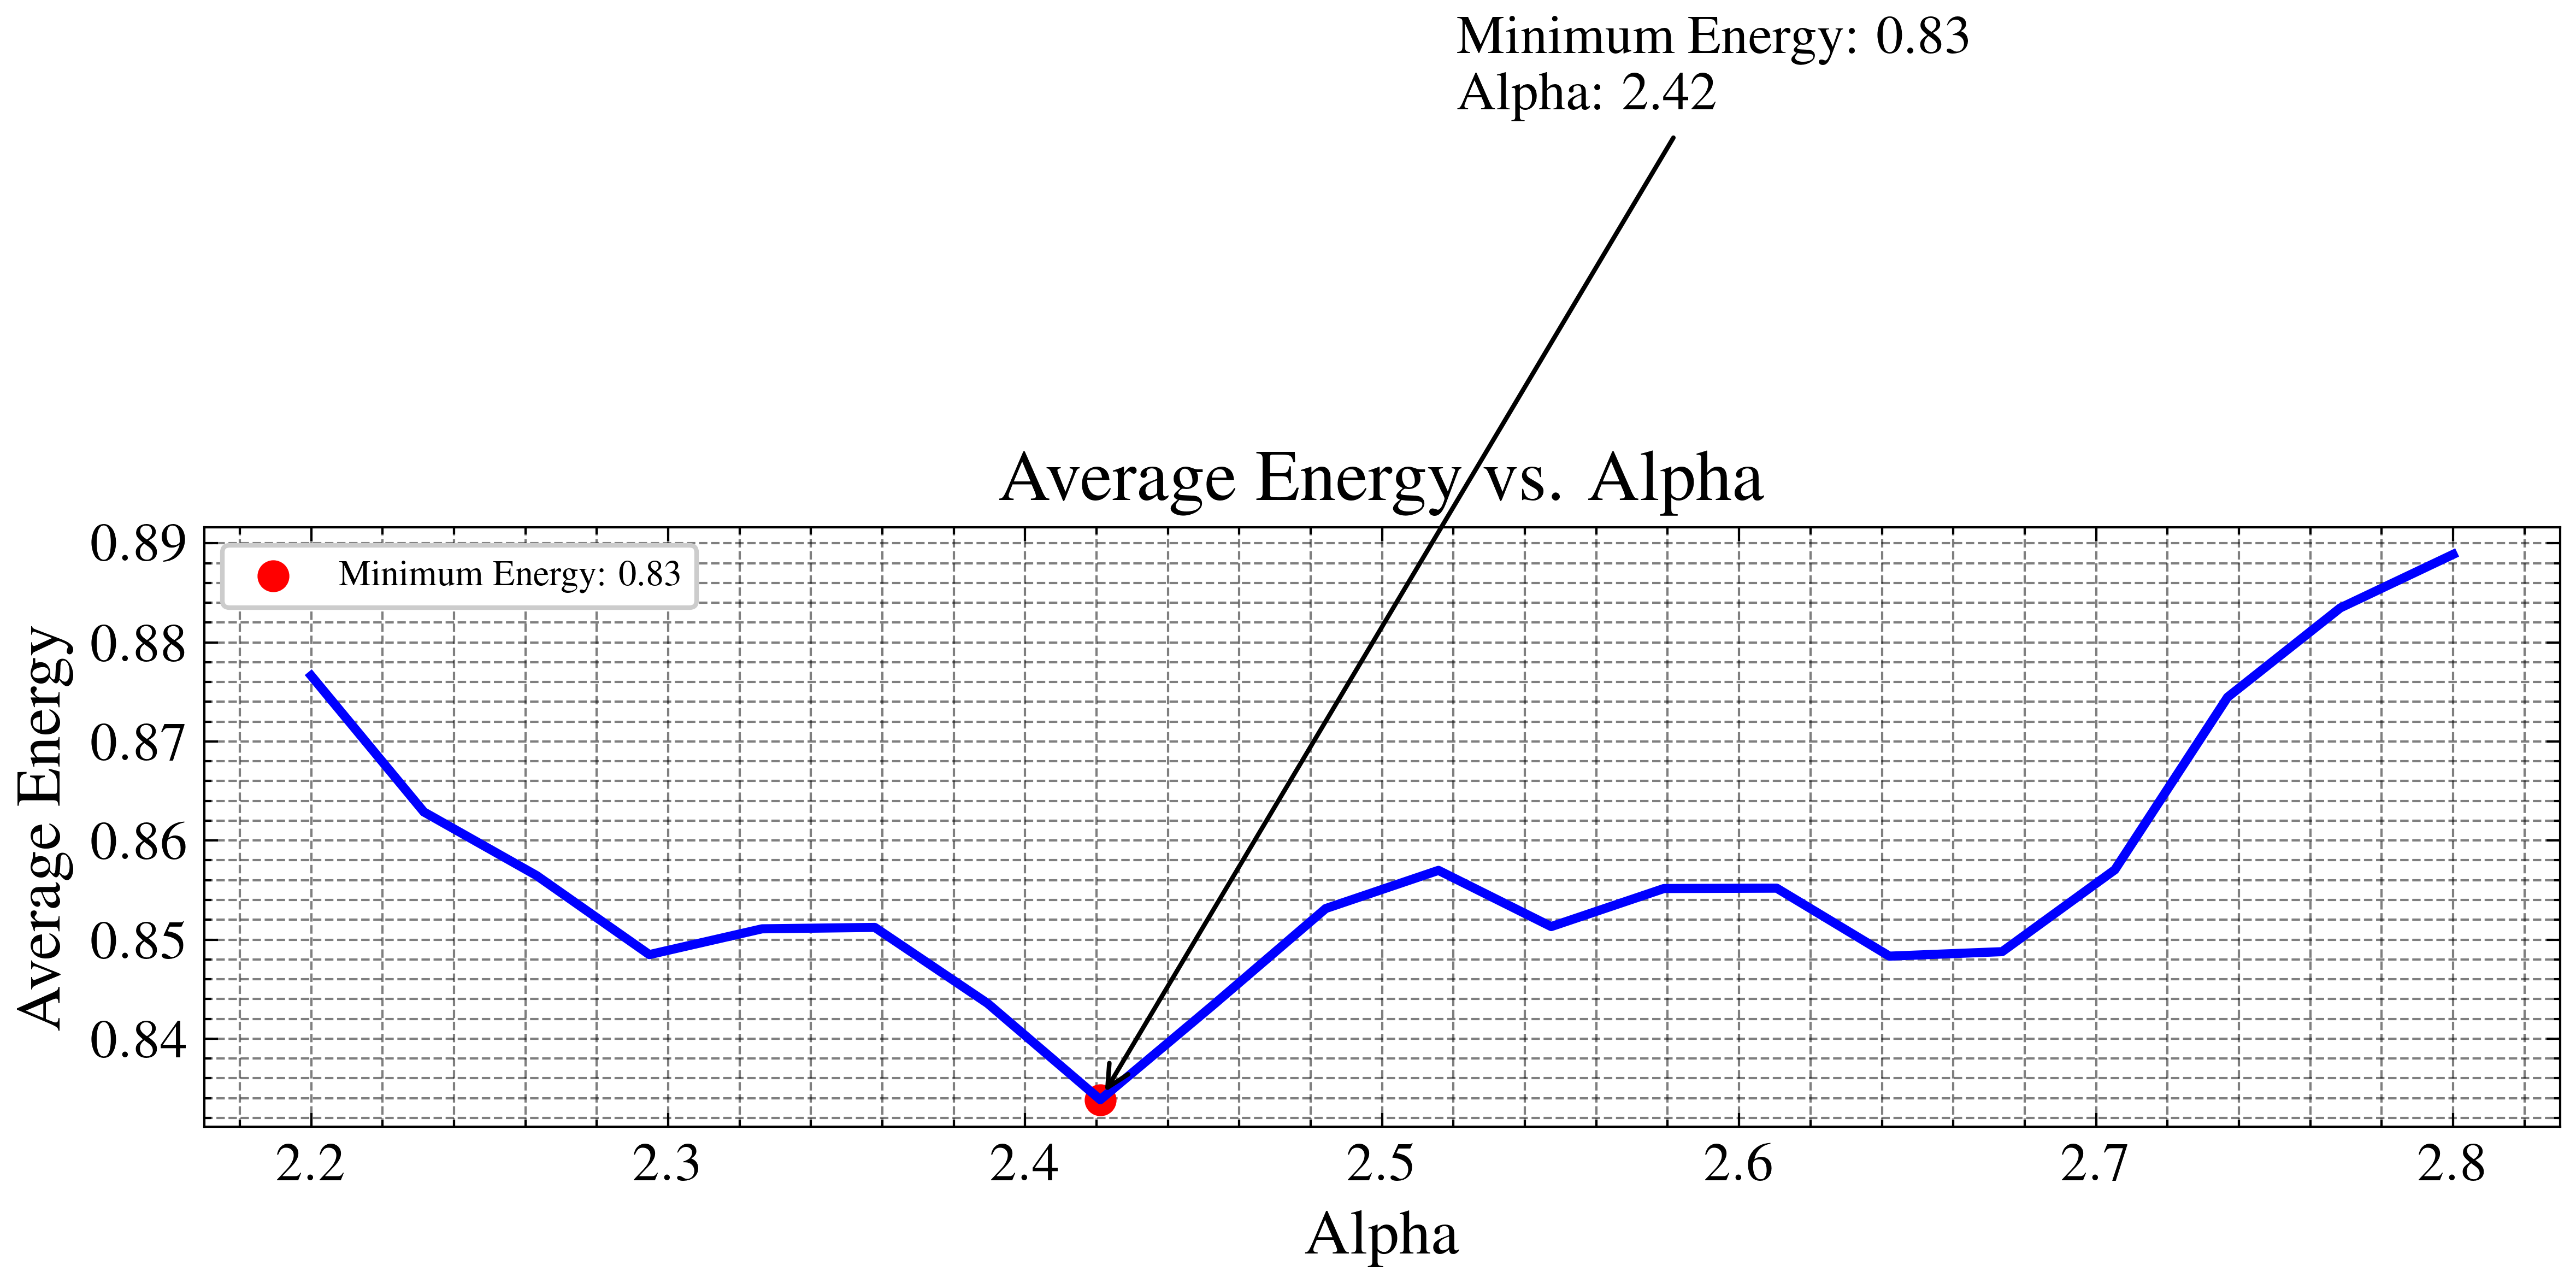

In [64]:
plt.figure(figsize=(8, 6))
plt.plot(alphas, average_energies, color='blue', linewidth=2, linestyle='-')
plt.scatter(corresponding_alpha, min_energy, color='red', label=f'Minimum Energy: {min_energy:.2f}')
plt.annotate(f'Minimum Energy: {min_energy:.2f}\nAlpha: {corresponding_alpha:.2f}',
             xy=(corresponding_alpha, min_energy),
             xytext=(corresponding_alpha + 0.1, min_energy + 0.1),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12)
plt.xlabel('Alpha', fontsize=14)
plt.ylabel('Average Energy', fontsize=14)
plt.title('Average Energy vs. Alpha', fontsize=16)
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

In [62]:
print("Minimum energy:", min_energy)
print("Corresponding alpha value:", corresponding_alpha)

Minimum energy: 0.8348690296065681
Corresponding alpha value: 2.473684210526316
